# Apresentação do Problema

Em muitos setores, como bancos, e-commerces e seguros, a fraude é um problema sério e pode causar grandes prejuízos financeiros, impactando negativamente a confiança dos clientes desses setores. O objetivo de um sistema de detecção de fraudes é identificar transações ou atividades fraudulentas com a maior precisão possível, minimizando transações que possam ser verdadeiras mas não são, e transações legítimas que são incorretamente classificadas como fraudulentas.

Um dos desafios na detecção de fraudes é que os dados geralmente são altamente desbalanceados, com a maioria das transações sendo legítimas e apenas uma pequena porcentagem sendo fraudulentas. Além disso, os fraudadores estão constantemente adaptando suas táticas, o que torna o problema dinâmico e em constante evolução.

Neste contexto, temos dois conjuntos de dados: um de treino (fraudTrain.csv) e outro de teste (fraudTest.csv). O objetivo é desenvolver um modelo preditivo capaz de identificar transações suspeitas com base em um conjunto de características fornecidas, utilizando o conjunto de treino para construir o modelo e o conjunto de testes para avaliar seu desempenho.


# Objetivo

O objetivo principal deste projeto é desenvolver e avaliar modelos preditivos capazes de identificar transações fraudulentas de maneira eficaz e eficiente. Especificamente, buscamos:

1 - Identificar e selecionar as características mais relevantes que ajudam a diferenciar transações legítimas de fraudulentas.

2- Explorar e comparar diferentes técnicas de aprendizado de máquina para a detecção de fraudes.

3 - Desenvolver estratégias para lidar com o problema do desbalanceamento de classes no dataset.

4- Minimizar a taxa de falsos positivos e falsos negativos, otimizando assim a eficiência do modelo na detecção de fraudes.

Esses objetivos servirão como base para criar um sistema de detecção de fraudes que possa ser implementado em cenários reais para prevenir perdas financeiras e proteger a integridade das transações.


## Biblioteca

In [ ]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Dataset

In [ ]:
#Carregando os Dataset e concatenando os datasets
df1 = pd.read_csv('/content/fraudTest.csv',decimal=",",thousands=".")
df2 = pd.read_csv('/content/fraudTrain.csv',decimal=",",thousands=".")
df3 = pd.concat([df1,df2],axis=0)

In [ ]:
#Exibindo informações do DataSet
#print(df3.info())
#print(df3.describe())
#print(df3.tail())

In [ ]:
## ACRESCENTANDO FEATURES, TRANSFORMAÇÃO DE FEATURES E EXCLUSÃO DE FEATURES

df3['trans_date_trans_time'] = pd.to_datetime(df3['trans_date_trans_time']) # Convertendo a feature de data

df3['day'] = df3['trans_date_trans_time'].dt.day # Criando uma nova feature 'Day'

df3['month'] = df3['trans_date_trans_time'].dt.month # Criando uma nova feature 'month'

df3['year'] = df3['trans_date_trans_time'].dt.year # Criando uma nova feature 'year'

df3['dob'] = pd.to_datetime(df3['dob']) # Convertendo a feature 'dob' em data

df3['age'] = (df3['trans_date_trans_time'] - df3['dob']).dt.days // 365 # Criando uma nova feature 'age'

df3['genero'] = df3['gender'].map({'M': 1,'F': 0}) # Transformando a featute categória 'gender' em feature númerica

df3.drop(['unix_time'],axis=1,inplace=True) # Exluindo a feature 'unix_time'

df3.drop(['dob'], axis=1, inplace=True) # Exluindo a feature 'dob'

meses_dict = {1:"Janeiro",2:"Fevereiro",3:"Março",4:"Abril",5:"Maio",6:"Junho",7:"Julho",8:"Agosto",9:"Setembro",10:"Outubro",11:"Novembro",12:"Dezembro"} # Dicionário para apoio a feature 'month_name'

df3['month_name'] = df3['month'].map(meses_dict) # Adição da nova feature 'month_name'

In [ ]:
# ESTABELECENDO UM NOVO DATAFRAME APENAS COM AS OPERAÇÕES FRAUDULENTAS

df_number = df3.select_dtypes(include= np.number)
df_number.head(5)

#dffraud = df3[df3['is_fraud'] == 1] # Filtrando o dataset em apenas transações fraudulentas
#dffraud.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,day,month,year,age,genero
0,0,2291163933867244,286,29209,339659,-809355,333497,3.398639e+07,-81200714.0,0.0,21,6,2020,52.0,1
1,1,3573030041201292,2984,84002,403207,-110436,302,3.945050e+16,-109960431.0,0.0,21,6,2020,30.0,0
2,2,3598215285024754,4128,11710,406729,-735365,34496,4.049581e+06,-74196111.0,0.0,21,6,2020,49.0,0
3,3,3591919803438423,6005,32780,285697,-808191,54767,2.881240e+16,-80883061.0,0.0,21,6,2020,32.0,1
4,4,3526826139003047,319,49632,442529,-8501700000000001,1126,4.495915e+07,-85884734.0,0.0,21,6,2020,65.0,1


In [ ]:
# EXIBIÇÃO DO DATAFRAME

#df3.info()
df3.shape
#df3.shape
#df3.describe().T

(330046, 27)

Dados Dataset

trans_date_trans_time: A data e hora da transação.

cc_num: número do cartão de crédito.

merchant: comerciante que estava sendo pago.

category: Em que área esse comerciante atua.

amt: Quantidade de dinheiro em dólares americanos.

first: nome do titular do cartão.

last: sobrenome do titular do cartão.

gender: Gênero do titular do cartão. Apenas masculino e feminino!

street: Rua da residência do titular do cartão

city:cidade de residência do titular do cartão

state: estado de residência do titular do cartão

zip: CEP da residência do titular do cartão

lat:latitude do titular do cartão

long:longitude do titular do cartão

city_pop:População da cidade

job:comércio do titular do cartão

dob:Data de nascimento do titular do cartão

trans_num: ID da transação

unix_time: Hora Unix que é a hora calculada desde 1970 até hoje.

merch_lat: latitude do comerciante

merch_long:longitude do comerciante

is_fraud: Se a transação é fraudulenta(1) ou não(0)

## Dados missing

In [ ]:
#Identificando quais coluns estão vazias - Sem dados missing
print("df3 - Quantidade de dados Nulos\n")
print(df3.isnull().sum())

df3 - Quantidade de dados Nulos

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
trans_num                1
merch_lat                2
merch_long               2
is_fraud                 2
day                      0
month                    0
year                     0
age                      1
genero                   0
month_name               0
dtype: int64


## Dados duplicados

In [ ]:
#Identificando se há dados duplicados
df3.duplicated()
#dfteste.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
163101,False
163102,False
163103,False
163104,False


## Análise Exploratória dos dados

Total de transações: 330046
Total de fraudes: 2183
Porcentagem de fraudes: 0.66%
Total de transações: 330046
Total de não fraudes: 327861
Porcentagem de não fraudes: 99.34%


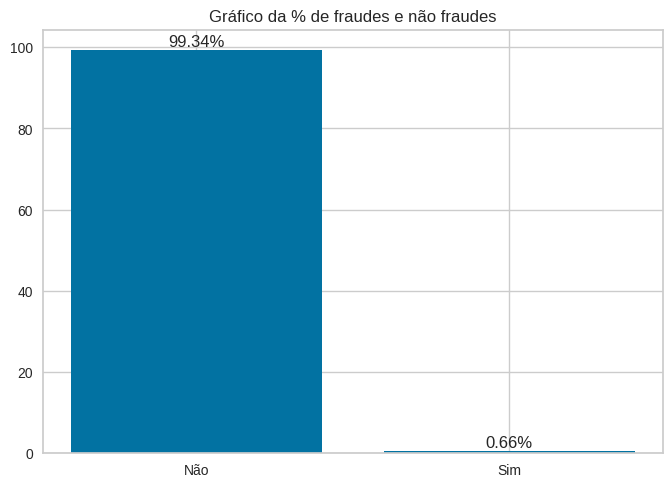

In [ ]:
# 1 - TOTAL DE FRAUDES E NÃO FRAUDES


total_transacoes = len(df3)
total_fraudes = len(df3[df3['is_fraud'] == 1])
porcentagem_fraudes = (total_fraudes / total_transacoes) * 100

print(f"Total de transações: {total_transacoes}")
print(f"Total de fraudes: {total_fraudes}")
print(f"Porcentagem de fraudes: {porcentagem_fraudes:.2f}%")

total_transacoes = len(df3)
total_n_fraude = len(df3[df3['is_fraud'] == 0])
porcentagem_n_fraude = (total_n_fraude / total_transacoes) * 100

print(f"Total de transações: {total_transacoes}")
print(f"Total de não fraudes: {total_n_fraude}")
print(f"Porcentagem de não fraudes: {porcentagem_n_fraude:.2f}%")

# GRÁFICO DE BARRAS
bar = df3["is_fraud"].value_counts().reset_index()
labels = ["Não", "Sim"]
percentages = bar["count"] / bar["count"].sum() * 100


plt.bar(labels, percentages)

for i, percentages in enumerate(percentages):
  plt.text(i,percentages,f"{percentages:.2f}%", ha="center", va="bottom")

plt.title("Gráfico da % de fraudes e não fraudes")
plt.show()

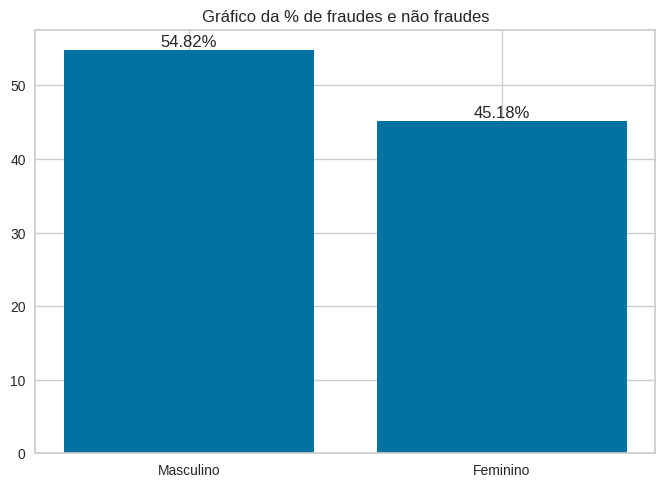

,count
genero,
0,180919
1,149127


In [ ]:
# 7 - QUAL É O GENÊRO MAIS AFETADO QUANDO OLHAMOS SOMENTE AS TRANSAÇÕES FRAUDULENTAS

labels = ["Masculino", "Feminino"]
gender_counts = df3["genero"].value_counts()
percentages = (gender_counts / gender_counts.sum()) * 100

plt.bar(labels, percentages)

for i, percentages in enumerate(percentages):
  plt.text(i,percentages,f"{percentages:.2f}%", ha="center", va="bottom")

plt.title("Gráfico da % de fraudes e não fraudes")
plt.show()

fraud = df3['genero'].value_counts()
display(fraud)


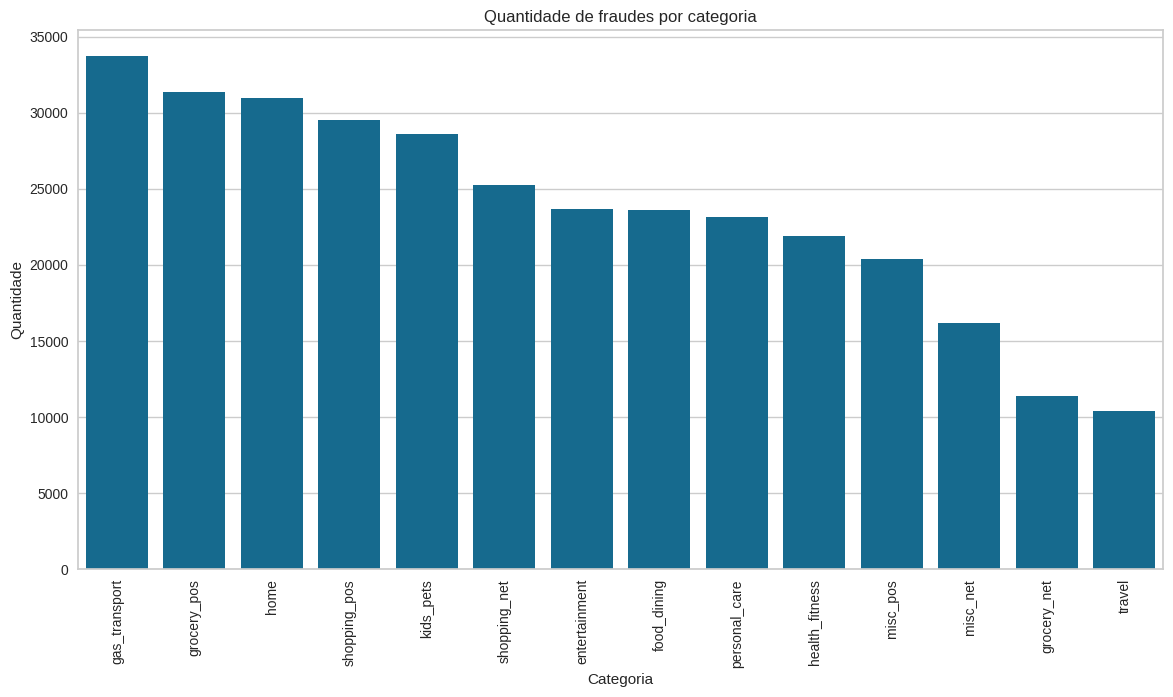

In [ ]:
# 8 - CATEGORIA DE ESTABELECIMENTO COM MAIOR RECORRÊNCIA DE FRAUDE

plt.figure(figsize= (14, 7))
sns.countplot(data=df3, x='category', order=df3['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Quantidade de fraudes por categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()


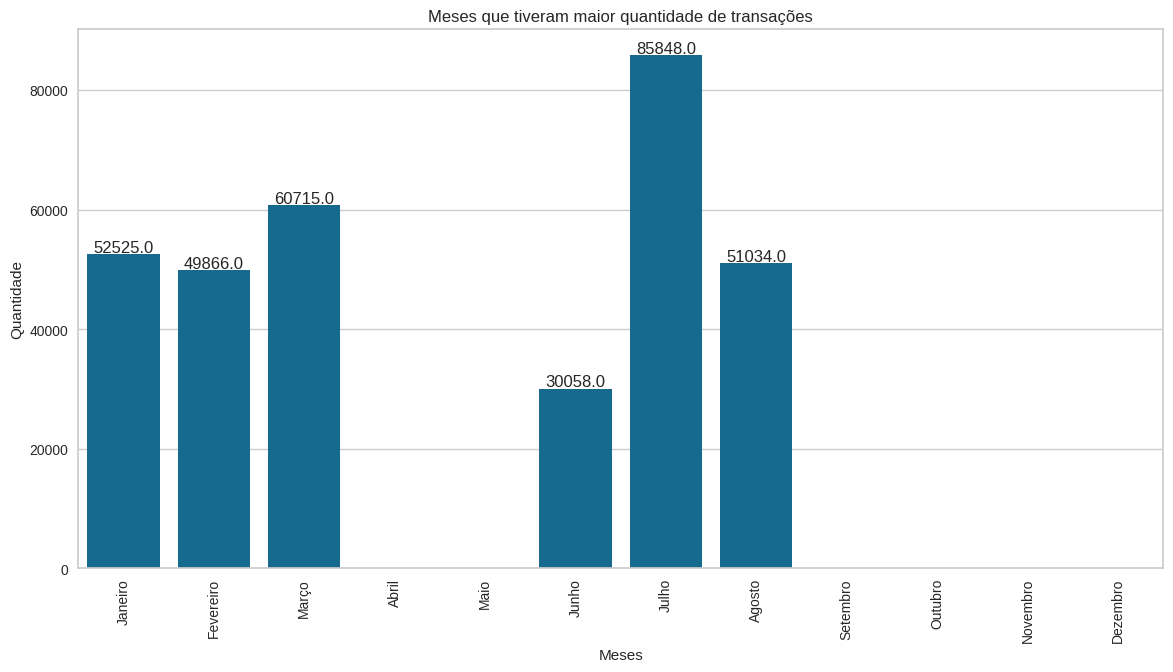

In [ ]:
# 9 - QUAL É O MÊS QUE REGISTROU MAIS TRANSAÇÕES (NÃO FRAUDULENTAS E FRAUDULENTAS)

plt.figure(figsize=(14,7))
ax = sns.countplot(data=df3, x='month_name', order=meses_dict.values())
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.title('Meses que tiveram maior quantidade de transações')
plt.xlabel('Meses')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# 10 - Qual é o periodo que teve maior ocorrência (manha, tarde ou noite)?


# Convert to datetime, handling errors by coercing invalid values to NaT

df3['hour'] = df3['trans_date_trans_time'].dt.hour

def categorize_period(hour):
    if 5 <= hour < 12:
        return 'Manhã'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

df3['period'] = df3['hour'].apply(categorize_period)

period_counts = df3['period'].value_counts()

max_period = period_counts.idxmax()
max_count = period_counts.max()

print(f"O período com maior ocorrência é: {max_period} com {max_count} transações.")

O período com maior ocorrência é: Noite com 154910 transações.


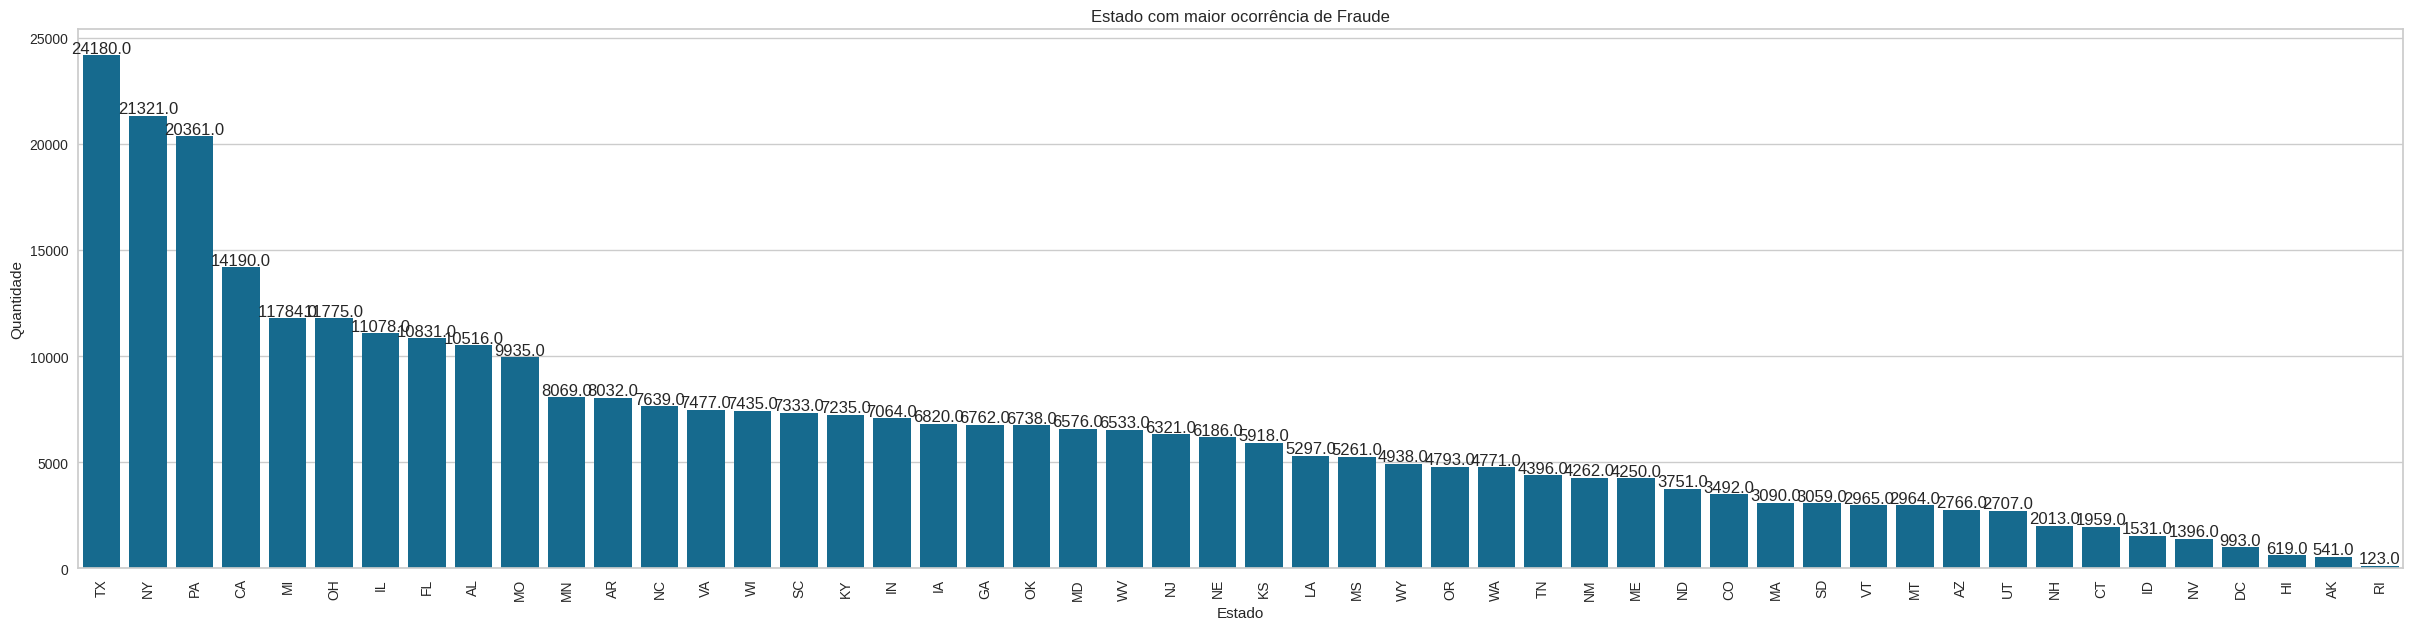

In [ ]:
# 11 - ESTADO COM A MAIOR OCORRÊNCIA DE FRAUDES

plt.figure(figsize=(30,7))
ax = sns.countplot(data=df3, x='state', order=df3['state'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.title('Estado com maior ocorrência de Fraude')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.show()

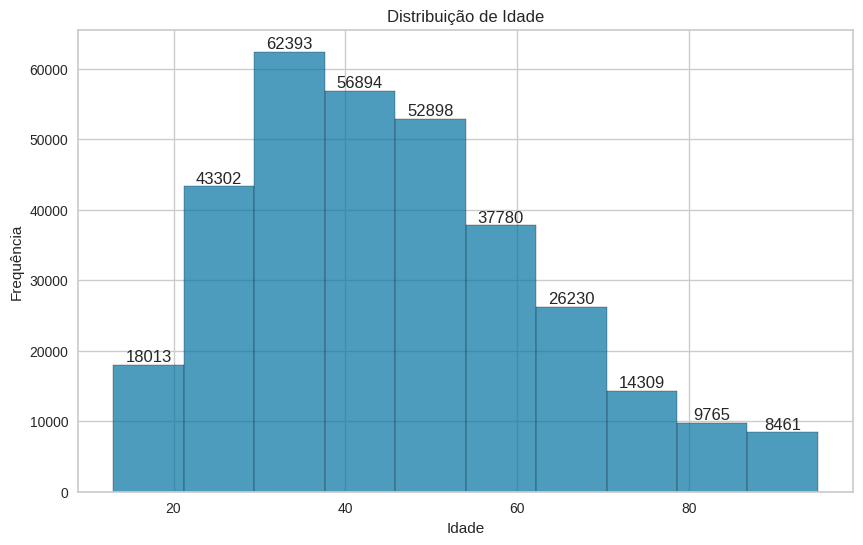

In [ ]:
# 12 - Qual é a faixa etária com a maior ocorrência de fraude ? E com menor ocorrencia?


plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df3['age'], bins=10, edgecolor='k', alpha=0.7)  # Cria o histograma

# Adicionar rótulos de dados
patches = plt.gca().patches
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height,
             f'{int(height)}', ha='center', va='bottom')

plt.title('Distribuição de Idade')  # Título do gráfico
plt.xlabel('Idade')  # Rótulo do eixo X
plt.ylabel('Frequência')  # Rótulo do eixo Y
plt.show()  # Exibe o gráfico



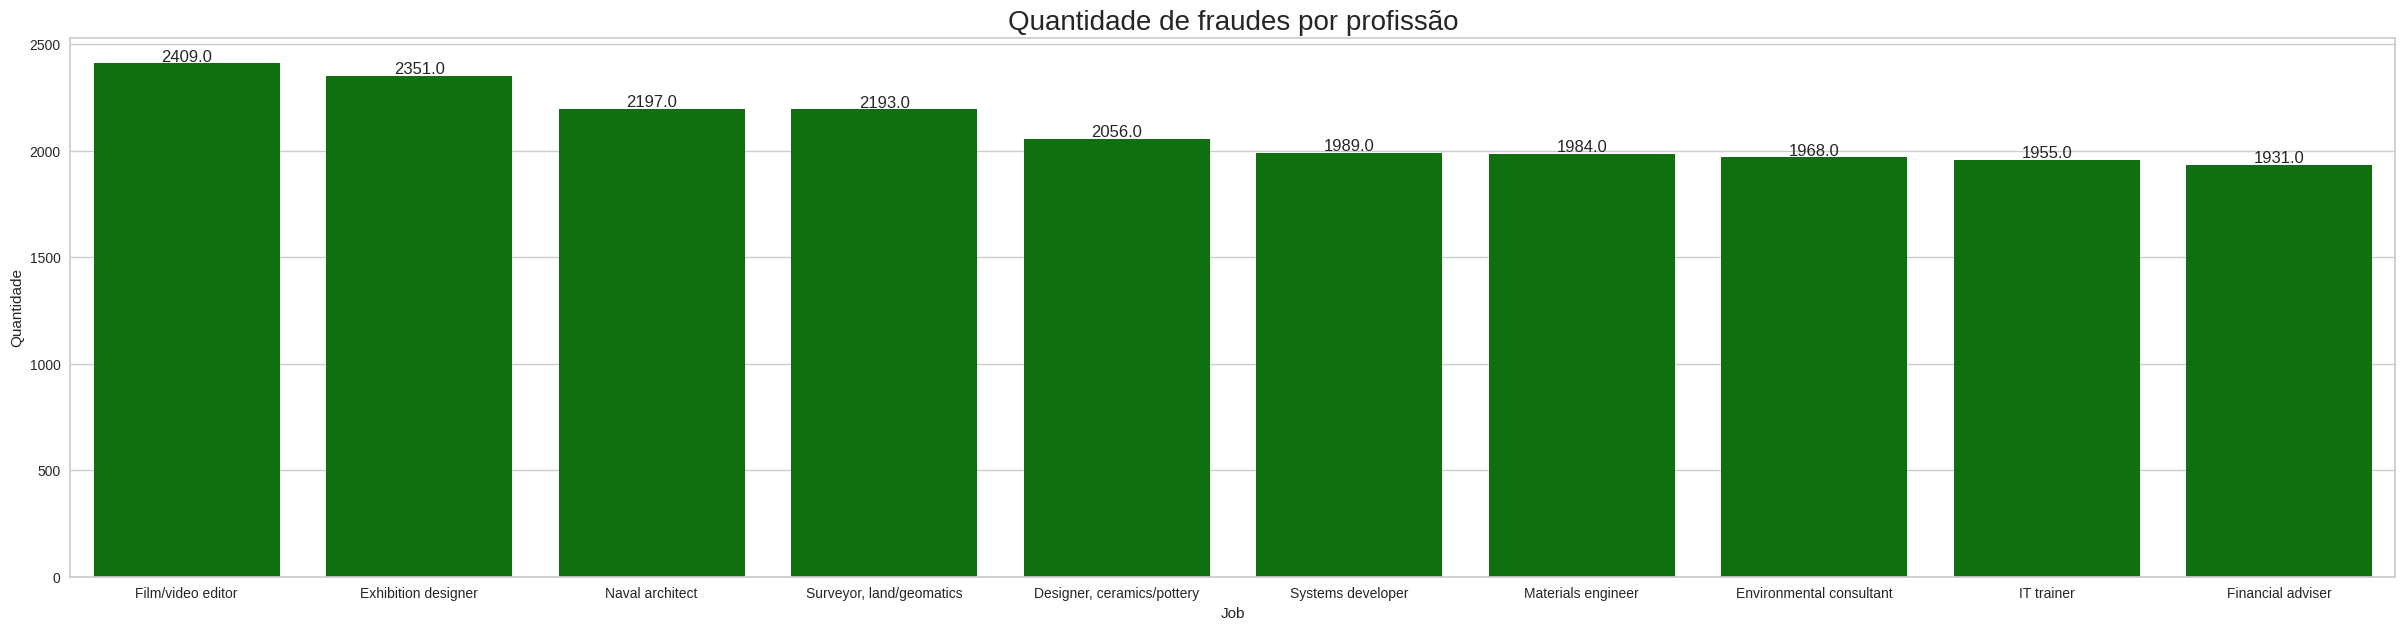

In [ ]:
# 14 - PROFISSÕES COM MAIOR ÍNDICE DE FRAUD

idx = fraud.index
val = fraud.values

plt.figure(figsize= (30, 7))
ax = sns.countplot(data=df3, x='job', order=df3['job'].value_counts().index, color='green')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.title('Quantidade de fraudes por profissão', fontsize=20)
plt.xlabel('Job')
plt.ylabel('Quantidade')
plt.xlim(-0.5,9.5)
plt.show()


In [ ]:
# 13 - Quantas tentativas são feitas a ponto de gerar uma fraude

num_fraudes = df3['is_fraud'].sum()
total_transacoes = df3['is_fraud'].count()
media = num_fraudes / total_transacoes

print(f'a cada: {media} temos uma fraude')

a cada: 0.00661426961253651 temos uma fraude


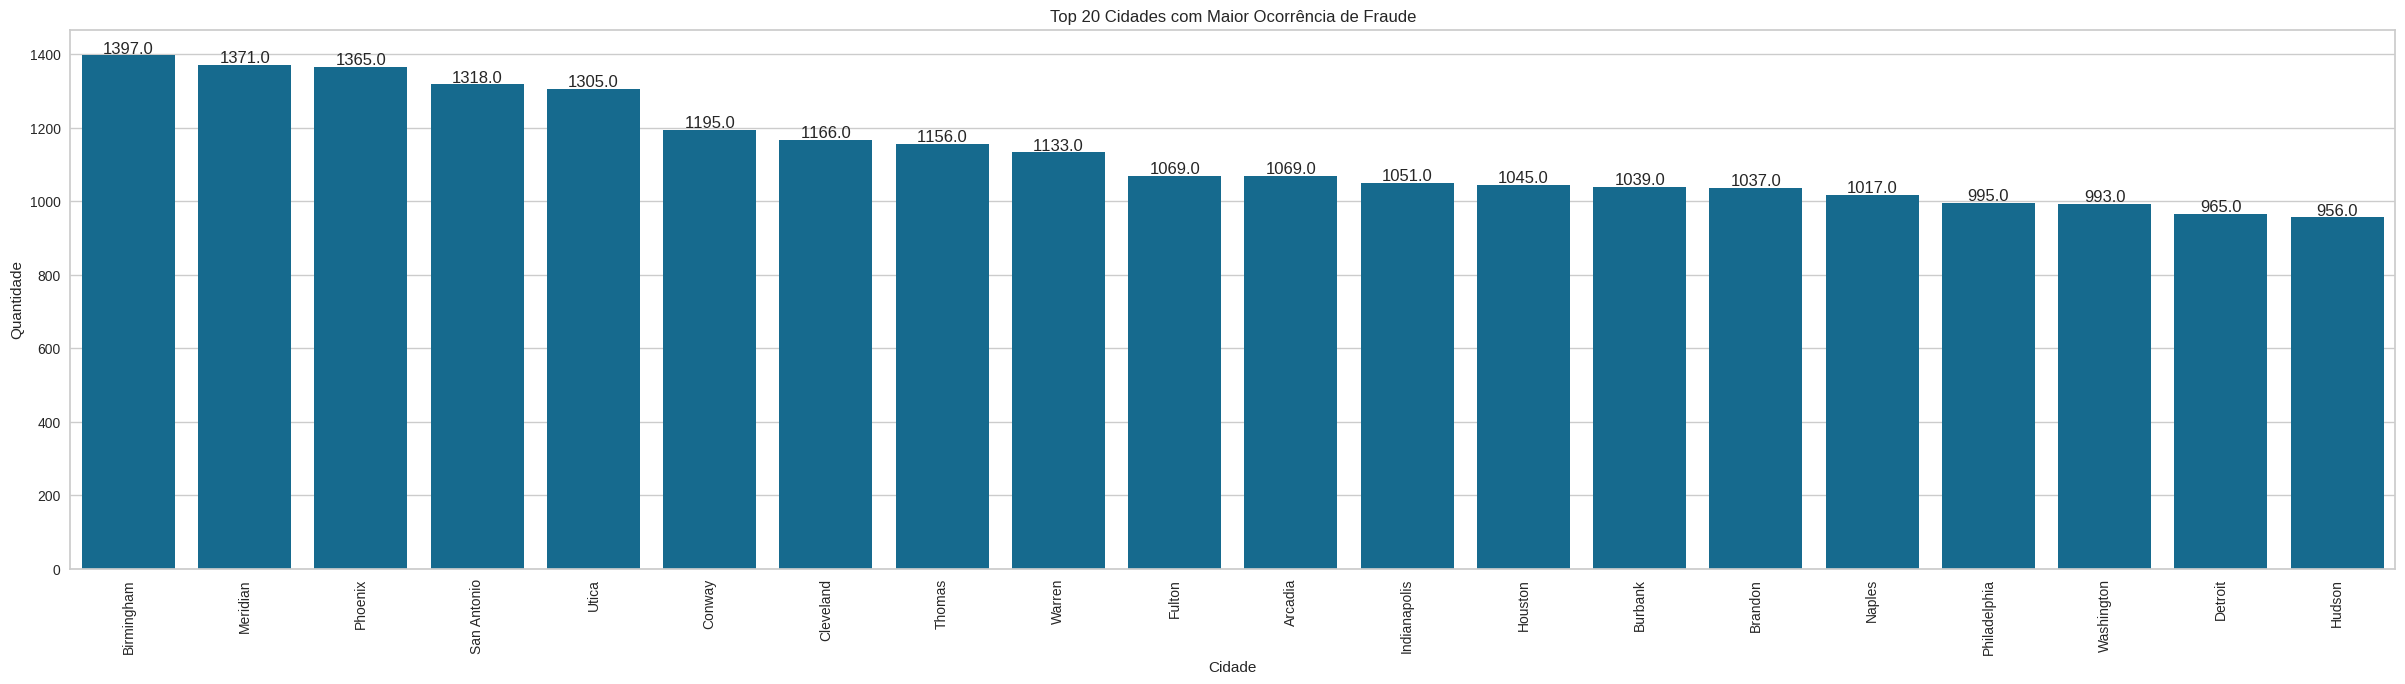

In [ ]:
# Quais as 20 cidades com maior número de fraudes

top_cities = df3['city'].value_counts().head(20).index
plt.figure(figsize=(30,7))
ax = sns.countplot(data=df3[df3['city'].isin(top_cities)], x='city', order=top_cities)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Top 20 Cidades com Maior Ocorrência de Fraude')
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# Para fazer a matriz de correlação precisamos transformar as variáveis categóricas em numericas utilizando One-Hot Encoding
# Então selecionamos as variáveis: genero, cidade e estado.

top_cities = df3['city'].value_counts().index[:5]
df3['city'] = df3['city'].apply(lambda x: x if x in top_cities else 'Other')

top_states = df3['state'].value_counts().index[:5]
df3['state'] = df3['state'].apply(lambda x: x if x in top_states else 'Other')


df3_encoded = pd.get_dummies(df3, columns=['city', 'state','gender'], drop_first=False)

print(df3_encoded.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category   amt   first  \
0                 fraud_Kirlin and Sons   personal_care   286    Jeff   
1                  fraud_Sporer-Keebler   personal_care  2984  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  4128  Ashley   
3                     fraud_Haley Group        misc_pos  6005   Brian   
4                 fraud_Johnston-Casper          travel   319  Nathan   

       last                       street    zip  ...  city_San Antonio  \
0   Elliott            351 Darlene Green  29209  ...             False   
1  Williams             3638 Marsh Union  84002  ...             False

is_fraud       1.000000
amt            0.212353
state_NY       0.005927
state_Other    0.005540
gender_F       0.004683
state_MI      -0.001600
gender_M      -0.004683
state_TX      -0.004723
state_CA      -0.004765
state_PA      -0.006008
Name: is_fraud, dtype: float64


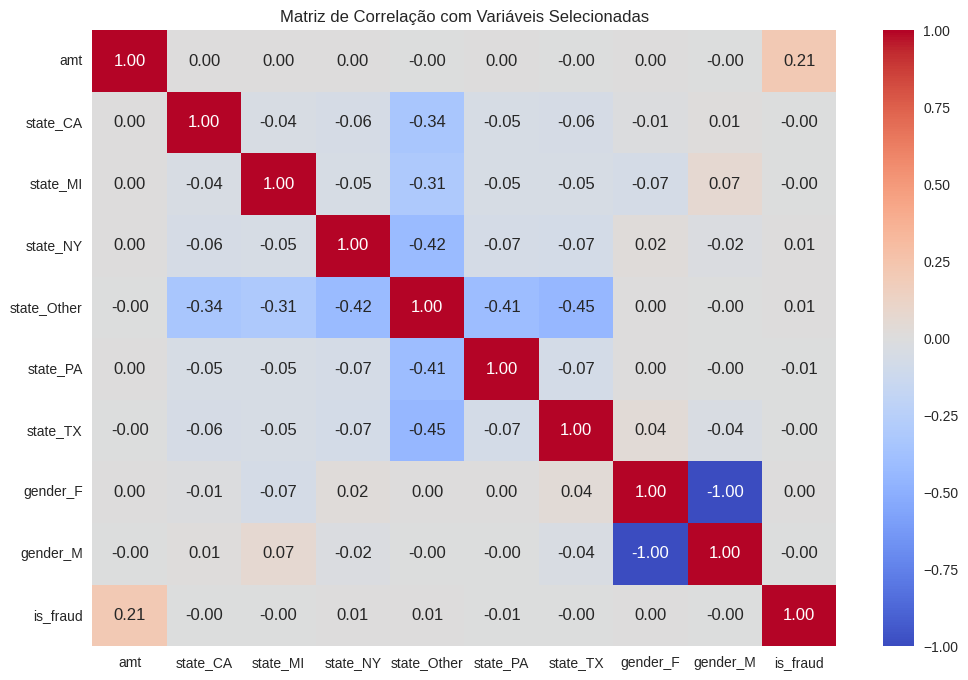

In [ ]:
#Fazer matriz de correlação para verificar nível de associação entre as variáveis genero, cidade e estado em relação a fraude

numerical_columns = ['amt']
categorical_columns = [col for col in df3_encoded.columns if 'gender_' in col or 'state_' in col or 'category_' in col]
target_column = ['is_fraud']

selected_columns = numerical_columns + categorical_columns + target_column

correlation_matrix = df3_encoded[selected_columns].corr()


print(correlation_matrix['is_fraud'].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Matriz de Correlação com Variáveis Selecionadas')
plt.show()

# Identificação e tratamento de Outliers


In [ ]:
# Função para encontrar outliers com Z-Score

def detect_outliers_zscore(df, threshold=3):
    z_scores = (df['amt'] - df['amt'].mean()) / df['amt'].std()
    return df[np.abs(z_scores) > threshold]

# Identificando outliers na coluna 'amt'
outliers_zscore = detect_outliers_zscore(df3)
print(f"Outliers encontrados com Z-Score:\n{outliers_zscore}")



Outliers encontrados com Z-Score:
        Unnamed: 0 trans_date_trans_time               cc_num  \
133            133   2020-06-21 12:55:19        4683638447911   
167            167   2020-06-21 13:08:46     6011109736646996   
428            428   2020-06-21 14:38:09       38530489946071   
464            464   2020-06-21 14:54:46  4798937978667559470   
600            600   2020-06-21 15:37:37      349612764943496   
...            ...                   ...                  ...   
162006      162006   2019-03-26 23:04:40        4755696071492   
162031      162031   2019-03-26 23:21:48      371683116218417   
162478      162478   2019-03-27 07:45:52  4092452671396169678   
163000      163000   2019-03-27 15:04:21      213186334552049   
163058      163058   2019-03-27 15:46:52     6011679934075347   

                               merchant      category     amt     first  \
133                fraud_Gislason Group        travel   55803    Daniel   
167                    fraud_Schumm

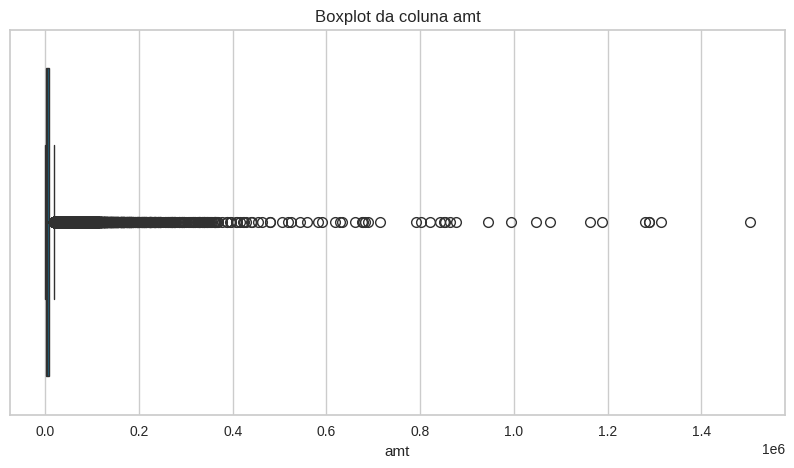

In [ ]:
#Boxplot

plt.figure(figsize=(10, 5))
sns.boxplot(x=df3['amt'])
plt.title(f"Boxplot da coluna amt")
plt.show()

In [ ]:
# Tratando os Outliers
# Selecionar a coluna que será analisada para outliers (exemplo: 'amt')

# Calcular o primeiro e terceiro quartis (Q1 e Q3)
Q1 = df3['amt'].quantile(0.25)
Q3 = df3['amt'].quantile(0.75)
IQR = Q3 - Q1  # Intervalo interquartil
# Definir os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = df3[(df3['amt'] < lower_bound) | (df3['amt'] > upper_bound)]

# Calcular a média da coluna, excluindo os outliers
mean_amt = df3[(df3['amt'] >= lower_bound) & (df3['amt'] <= upper_bound)]['amt'].mean()
# Substituir os outliers pela média calculada
df3['amt'] = np.where((df3['amt'] < lower_bound) | (df3['amt'] > upper_bound), mean_amt, df3['amt'])

# Verificar o resultado
print(f"Média calculada para substituir os outliers: {mean_amt}")
print(df3['amt'].describe())  # Estatísticas após o tratamento dos outliers


Média calculada para substituir os outliers: 4517.720684674089
count    330046.000000
mean       4517.720685
std        4143.384752
min          10.000000
25%         768.000000
50%        3973.000000
75%        7055.000000
max       18468.000000
Name: amt, dtype: float64


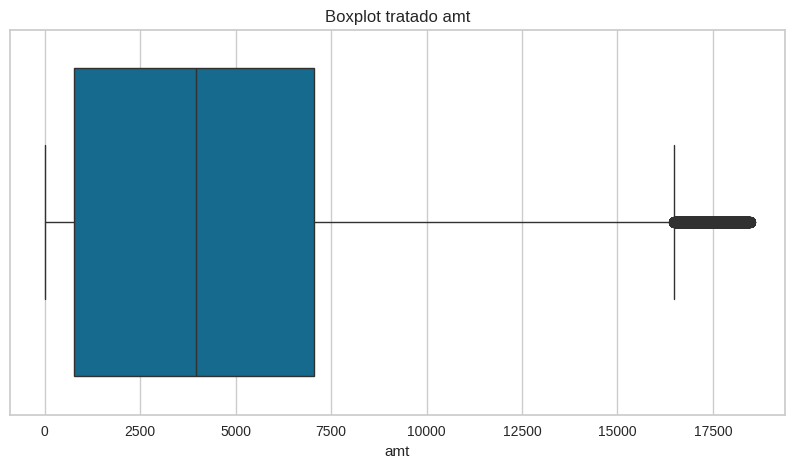

In [ ]:
# Boxplot com Outliers tratados

plt.figure(figsize=(10, 5))
sns.boxplot(x=df3['amt'])
plt.title(f"Boxplot tratado amt")
plt.show()

# PCA (Componentes Principais)

In [ ]:
from sklearn.preprocessing import StandardScaler

df = df3_encoded.copy()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

print(pd.DataFrame(df_scaled, columns=numeric_columns).head())

   Unnamed: 0    cc_num       amt       zip       lat      long  city_pop  \
0   -1.731573 -0.317276 -0.406259 -0.729542 -0.143825  0.160438  0.807067   
1   -1.731552 -0.316297 -0.227890  1.308565 -0.143825  0.160438 -0.294247   
2   -1.731531 -0.316278 -0.152258 -1.380443 -0.143825  0.160438 -0.181225   
3   -1.731510 -0.316282 -0.028166 -0.596713 -0.143825  0.160438 -0.114223   
4   -1.731489 -0.316332 -0.404077  0.030122 -0.143825 -5.861517 -0.291523   

   merch_lat  merch_long  is_fraud       age    genero  
0  -0.534586    0.541462 -0.081598  0.364837  1.101448  
1   1.932198    0.541462 -0.081598 -0.893801 -0.907896  
2  -0.534586    0.541462 -0.081598  0.193205 -0.907896  
3   1.267012    0.541462 -0.081598 -0.779380  1.101448  
4  -0.534586    0.541462 -0.081598  1.108579  1.101448  


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Componentes Principais')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

print(f"Número de componentes para explicar 95% da variância: {pca.n_components_}")

print(f"Dimensões dos dados após PCA: {df_pca.shape}")


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], alpha=0.5)
plt.title('Visualização PCA com 2 Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Selecionar Algoritmos e Definir Parâmetros a serem testados

## Planejamento do uso do modelo.

 O conjunto de dados tem por objetivo identificar fraudes, sendo essa a variável target. As variáveis do conjunto de dados são em sua maioria variáveis categóricas, sendo assim, utilizamos a biblioteca PyCaret para implementar modelos de aprendizado de máquina.

 Essa biblioteca permite a comparação e escolha do melhor modelo, selecionando as caracteristicas da amostra, treinando o modelo e avaliando desempenho.

 Após a aplicação da biblioteca, a importação e preparação do ambiente fez-se:
  -Limpeza dos dados, removendo linhas de valores ausentes;
  -Verificação da existência de dados duplicados;
  -Definição da variável alvo "is_fraud";
  -Aplicação do PyCaret, realizando as etapas de pré-processamento e configurações automáticas, com tratamento dos valores ausentes, ocorrências das variações categóricas e divisão do conjunto entre treino e teste;
  -Implementação dos modelos: Random Forest e XGBoost a fim de identificar qual deles tem o melhor desempenho entre os modelos de classificação;
  -Após identificação do modelo, é feito o ajuste de Hiperparâmetros;

Por fim, foi aplicado o modelo de regressão logística O modelo escolhido como o mais ajustado para a base de fraude foi o Random Forest, pois é ele é capaz de identificar quais características são mais importantes dentre um conjunto de dados e é um modelo robusto para corrigir imperfeições da amostra, como por exemplo, dados ausentes.

O Random Forest é composto por várias árvores de decisão, onde cada árvore é construída a partir de uma amostra estimada do conjunto de dados e é treinada de forma independente. Ao rodar o modelo, ele gera uma amostragem aleatória durante a construção de cada árvore, utilizando bootstrapping dos dados originais, o que ajuda a introduzir heterogeneidade entre as árvores e selecionar um subconjunto aleatório de recursos diminuindo a robustez do modelo.

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 58.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [ ]:
df_cleaned = df.dropna(subset=['is_fraud'])

In [ ]:
import pandas as pd
from pycaret.classification import *

# Usar o DataFrame limpo após remover os valores ausentes
df_cleaned = df.dropna(subset=['is_fraud'])

# Verificar se ainda há índices duplicados
print(df_cleaned.index.duplicated().sum(), "duplicated indices")
df_cleaned = df_cleaned.reset_index(drop=True)

# Definição da variável alvo (target) e as preditoras (X)
target = 'is_fraud'

# Setup do PyCaret
clf_setup = setup(data=df_cleaned, target=target, session_id=42)

0 duplicated indices


,Description,Value
0,Session id,42
1,Target,is_fraud
2,Target type,Binary
3,Original data shape,"(330044, 40)"
4,Transformed data shape,"(330044, 62)"
5,Transformed train set shape,"(231030, 62)"
6,Transformed test set shape,"(99014, 62)"
7,Numeric features,15
8,Date features,1
9,Categorical features,9


In [ ]:
# comparação apenas modelos específicos  (Random Forest e XGBoost)
best_model = compare_models(include=['rf', 'xgboost'])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9936,0.8519,0.0333,0.3000,0.0596,0.0593,0.0986,3.5170
xgboost,Extreme Gradient Boosting,0.9934,0.6968,0.0000,0.0000,0.0000,0.0000,0.0000,1.1970


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
# Comparação os modelos de classificação
from pycaret.classification import *
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:39:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9934,0.5460,0.0000,0.0000,0.0000,0.0000,0.0000,1.2960


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# reduçao o número de iterações e usar menos folds
tuned_model = tune_model(best_model, n_iter=10, fold=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:03:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:
#  uso de Logistic Regression modelo mais leve
from pycaret.classification import *
lr_model = create_model('lr')

# Ajuste dos hiperparâmetros no modelo mais leve
tuned_model = tune_model(lr_model, n_iter=10, fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9936,0.4721,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9936,0.5313,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9936,0.4752,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9936,0.5041,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9936,0.5198,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9937,0.4661,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9937,0.4818,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9937,0.4383,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9936,0.4601,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9936,0.4920,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9936,0.5027,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9936,0.4734,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9936,0.4894,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0000,0.0121,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


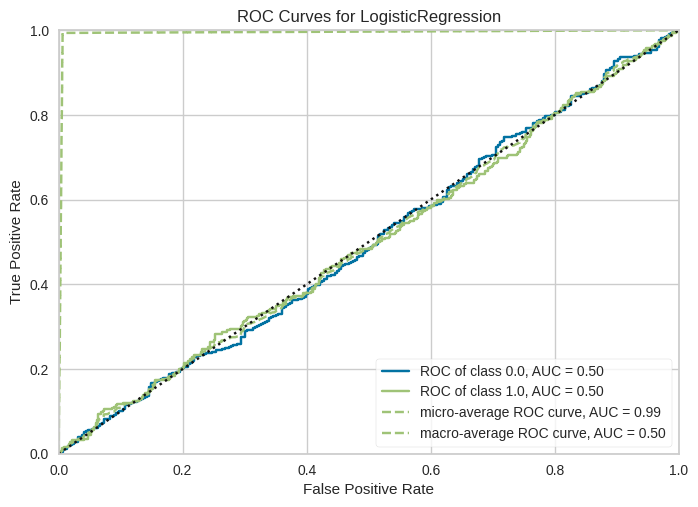

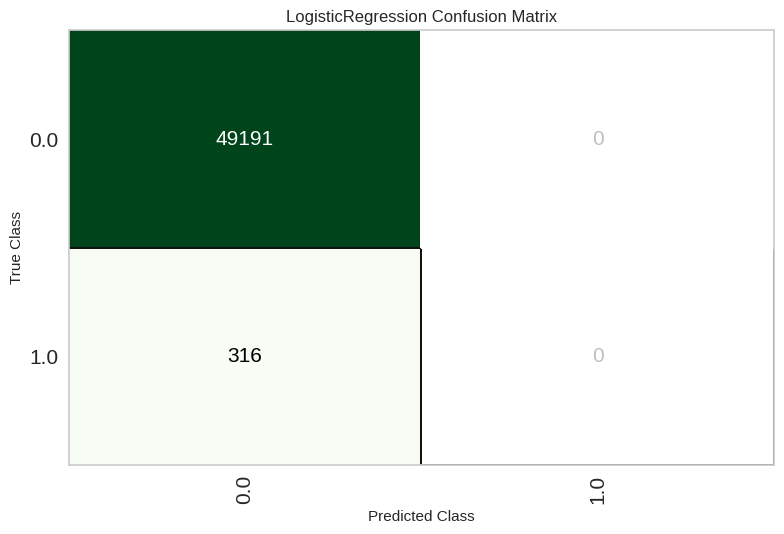

In [ ]:
# Avaliação do modelo usando uma curva ROC-AUC
plot_model(tuned_model, plot='auc')

# Avaliação do modelo usando a matriz de confusão
plot_model(tuned_model, plot='confusion_matrix')


In [ ]:
# Previsões no conjunto de teste
predictions = predict_model(tuned_model)
print(predictions)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9936,0.4973,0.0000,0.0000,0.0000,0.0000,0.0000


        Unnamed: 0 trans_date_trans_time               cc_num  \
293917      126978   2019-03-11 09:43:01       30273037698427   
40455        40455   2020-07-05 14:45:44      371226440126102   
36125        36125   2020-07-03 23:06:38     3560797065840735   
142262      142262   2020-08-10 04:31:58     4969856774088583   
14194        14194   2020-06-26 03:18:56      373043435942726   
...            ...                   ...                  ...   
176227        9288   2019-01-06 20:16:42  4761403817546679245   
306434      139495   2019-03-17 09:15:57     6011367958204270   
64494        64494   2020-07-13 15:32:32      343668971234893   
81924        81924   2020-07-19 23:30:29     4518350514020532   
67748        67748   2020-07-14 12:32:05     6011693194885790   

                                    merchant        category    amt  \
293917             fraud_Runolfsson and Sons     grocery_net     99   
40455                     fraud_Kihn-Fritsch     food_dining   6669   
36125 